In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from importlib import reload
from scipy import interpolate

In [90]:
alts = np.linspace(90., 120., 1000)
alts_dayglow = np.linspace(90., 150., 1000)
times = np.linspace(0., 400., 2000)
ALTS, TIMES = np.meshgrid(alts, times)
ALTS_DAYGLOW, TIMES_DAYGLOW = np.meshgrid(alts_dayglow, times)
dz = alts[1]-alts[0]

In [95]:
file_airglow = './data/VER_profile_scaled.csv'
VER = pd.read_csv(file_airglow)
VER.columns=['VER', 'alt']
#VER.loc[:,'VER'] *= 1e11
#VER.to_csv(file_airglow.replace('.csv', '_scaled.csv'), index=False)
f_VER = interpolate.interp1d(VER.alt, VER.VER, kind='quadratic', bounds_error=False, fill_value=0.)

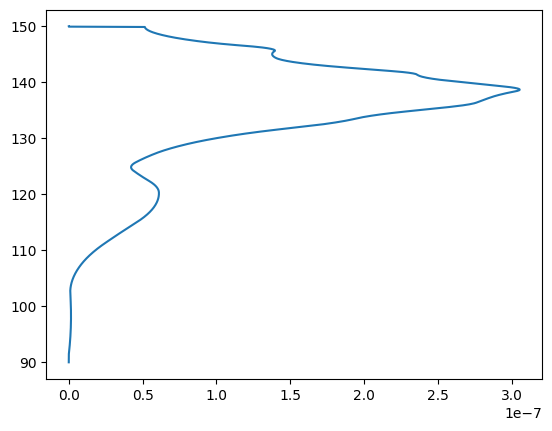

In [96]:
file_airglow = './data/VER_profile_dayglow.csv'
VER = pd.read_csv(file_airglow)
VER.columns=['VER', 'alt']
VER.to_csv(file_airglow.replace('.csv', '_scaled.csv'), index=False)
f_VER_dayglow = interpolate.interp1d(VER.alt, VER.VER, kind='quadratic', bounds_error=False, fill_value=0.)

plt.figure()
plt.plot(f_VER_dayglow(alts_dayglow), alts_dayglow)

In [97]:
file_atmos = './data/profile_VCD_for_scaling_pd.csv'
profile = pd.read_csv(file_atmos)
f_rho = interpolate.interp1d(profile.altitude/1e3, profile.rho, kind='quadratic')
f_t = interpolate.interp1d(profile.altitude/1e3, profile.t, kind='quadratic')
f_gamma = interpolate.interp1d(profile.altitude/1e3, profile.gamma, kind='quadratic')

,altitude,t,p,rho,gamma
0,0.00,733.082,9.545830e+06,6.802600e+01,1.19476
1,7352.94,680.968,5.899770e+06,4.525800e+01,1.20075
2,14705.90,626.204,3.506250e+06,2.924680e+01,1.20781
3,22058.80,570.714,1.988280e+06,1.818740e+01,1.21597
4,29411.80,510.574,1.063890e+06,1.088210e+01,1.22626
5,36764.70,447.514,5.252790e+05,6.127500e+00,1.23919
6,44117.60,394.450,2.351760e+05,3.111160e+00,1.25239
7,51470.60,343.816,9.511750e+04,1.443620e+00,1.26774
8,58823.50,276.688,3.206550e+04,6.046860e-01,1.29435
9,66176.50,251.460,9.013370e+03,1.871280e-01,1.30707


## Nightglow

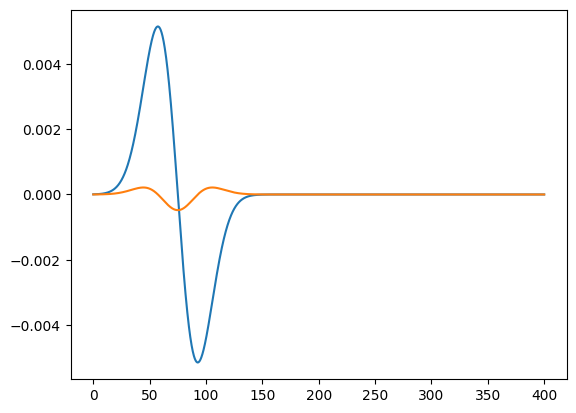

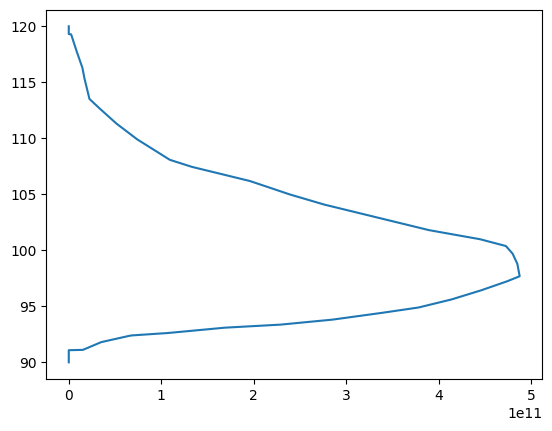

In [57]:
tau = 0.5*1e4 # s, after eq. 23 in Lognonne, 2016
period = 50.
surface_amplitude = 1.5e-1 # m/s, at airglow altitude
c = 200 # km/s
z0 = 90.
amplification = np.sqrt(f_rho(z0)/f_rho(alts))
Az = surface_amplitude*amplification
#dzAz = np.r_[0., np.diff(Az) / dz]
dzAz = np.gradient(Az, alts)
dzAz = interpolate.interp1d(alts, dzAz, kind='quadratic', bounds_error=False, fill_value=0.)
std_t = period/2.
t0 = 3*std_t
#f0 = np.exp(-((times-t0)/std_t)**2)
f0 = -2*(1/std_t)*((times-t0)/std_t)*np.exp(-((times-t0)/std_t)**2)
#f0 = np.sin(2*np.pi*times/period)
f0 = interpolate.interp1d(times, f0, kind='quadratic', bounds_error=False, fill_value=0.)
#df0dt = -2*(1/std_t)*((times-t0)/std_t)*np.exp(-((times-t0)/std_t)**2)
#df0dt = np.r_[0., np.diff(f0(times)) / dz]
df0dt = np.gradient(f0(times), times)
df0dt = interpolate.interp1d(times, df0dt, kind='quadratic', bounds_error=False, fill_value=0.)

plt.figure()
plt.plot(times, f0(times)*Az[0])
plt.plot(times, df0dt(times)*Az[0])

plt.figure()
#plt.plot(dzAz(alts), alts, )
#plt.plot(amplification, alts, )
plt.plot(f_VER(alts), alts, )


dVER = -(tau/(1+(2*np.pi/period)*tau)) * f_VER(ALTS) * (-(1/c)*df0dt(TIMES-(ALTS-alts.min())*1e3/c)*Az + dzAz(ALTS)*f0(TIMES-(ALTS-alts.min())*1e3/c))

<Figure size 640x480 with 0 Axes>

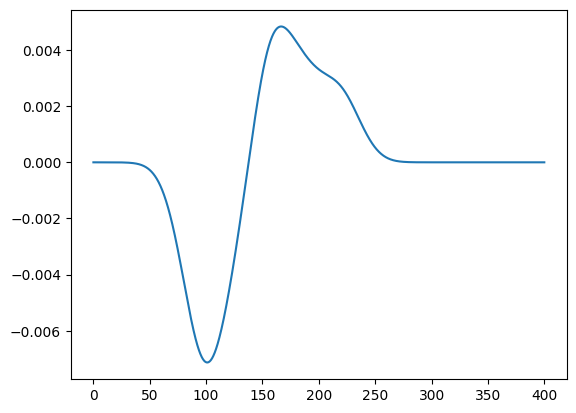

In [69]:
df0dt = None
f0 = None
time_to_airglow = 0#90./0.6
background = 0.5

plt.figure()
#sc = plt.pcolormesh(times+time_to_airglow, alts, (abs(dVER).T/f_VER(ALTS).T)/background, levels=[1e-3, 1e-2, 0.1])
#plt.plot(times, f0)
#plt.plot(times, df0dt(times))
#plt.plot(alts, dzAz(alts))
#plt.plot(alts, f_rho(alts))
#plt.yscale('log')
#plt.colorbar(sc)

plt.figure()
plt.plot(times, np.trapz((dVER), x=alts, axis=1)/np.trapz(f_VER(alts), x=alts,))
#plt.axhline(np.trapz(f_VER(alts), x=alts,))

In [87]:
background_radiance_nightglow = 1.6e15
factor_radiance_to_pix = 2e4/background_radiance_nightglow
radiance = np.trapz((dVER), x=alts*1e3, axis=1)
n_for_binning = 5
photons_signal = radiance.max()*factor_radiance_to_pix*n_for_binning
photons_background = np.sqrt(np.trapz(f_VER(alts), x=alts*1e3,)*factor_radiance_to_pix)
photons_signal/photons_background

6.488243935659677

## Dayglow

In [266]:
alpha = 1e-2
period = 50.
surface_amplitude = 5e-3 # m/s, at airglow altitude
c = 200 # km/s
z0 = 90.

#amplification = np.sqrt(f_rho(z0)/f_rho(alts_dayglow))
amplification = np.exp(-((alts_dayglow-145.)/15.)**2)*1200.+1.
Az = surface_amplitude*amplification
Az = interpolate.interp1d(alts_dayglow, Az, kind='quadratic', bounds_error=False, fill_value=0.)
dzAz = np.gradient(Az(alts_dayglow), alts_dayglow)
dzAz = interpolate.interp1d(alts_dayglow, dzAz, kind='quadratic', bounds_error=False, fill_value=0.)
std_t = period/2.
t0 = 3*std_t
#f0 = -2*(1/std_t)*((times-t0)/std_t)*np.exp(-((times-t0)/std_t)**2)
f0 = np.exp(-((times-t0)/std_t)**2) # Conversion to displacement
f0 = interpolate.interp1d(times, f0, kind='quadratic', bounds_error=False, fill_value=0.)
df0dt = np.gradient(f0(times), times)
df0dt = interpolate.interp1d(times, df0dt, kind='quadratic', bounds_error=False, fill_value=0.)
dVERdz = np.gradient(f_VER_dayglow(alts_dayglow), alts_dayglow)
dVERdz = interpolate.interp1d(alts_dayglow, dVERdz, kind='quadratic', bounds_error=False, fill_value=(0., dVERdz[-1]))

dVER_ad = alpha*(1.-f_gamma(ALTS_DAYGLOW))*f_t(ALTS_DAYGLOW)*f_VER_dayglow(ALTS_DAYGLOW)*(-(1/c)*df0dt(TIMES_DAYGLOW-(ALTS_DAYGLOW-alts_dayglow.min())*1e3/c)*Az(ALTS_DAYGLOW) + dzAz(ALTS_DAYGLOW)*f0(TIMES_DAYGLOW-(ALTS_DAYGLOW-alts_dayglow.min())*1e3/c))
dVER_tr = -f0(TIMES_DAYGLOW-(ALTS_DAYGLOW-alts_dayglow.min())*1e3/c)*Az(ALTS_DAYGLOW)*dVERdz(ALTS_DAYGLOW)

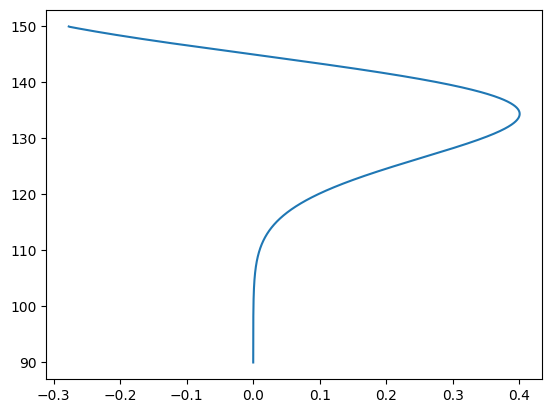

In [265]:
plt.figure()
#f_VER_dayglow = interpolate.interp1d(VER.alt, VER.VER, kind='quadratic', bounds_error=False, fill_value=(0., VER.VER.iloc[-1]))
#plt.plot(dzAz(alts_dayglow), alts_dayglow)
plt.plot(dzAz(alts_dayglow), alts_dayglow)

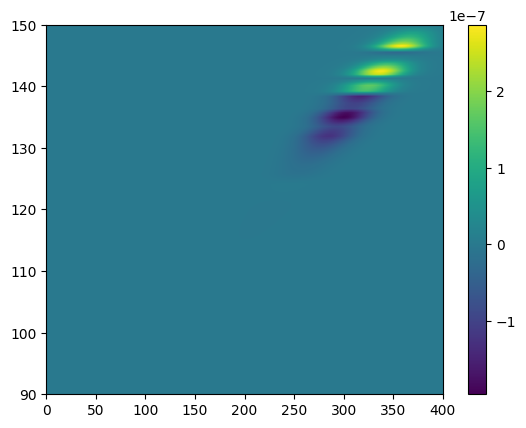

In [267]:
plt.figure()
sc = plt.pcolormesh(times, alts_dayglow, (dVER_ad+dVER_tr).T)
plt.colorbar(sc)

C:\Users\quentin\AppData\Local\Temp\ipykernel_26584\548417075.py:11: RuntimeWarning: overflow encountered in exp
  attenuation = np.exp(-np.cumsum(alpha_att*dz))
C:\Users\quentin\AppData\Local\Temp\ipykernel_26584\548417075.py:12: RuntimeWarning: overflow encountered in multiply
  return attenuation*amplification


[1.87144958e-206 4.51506049e+002]


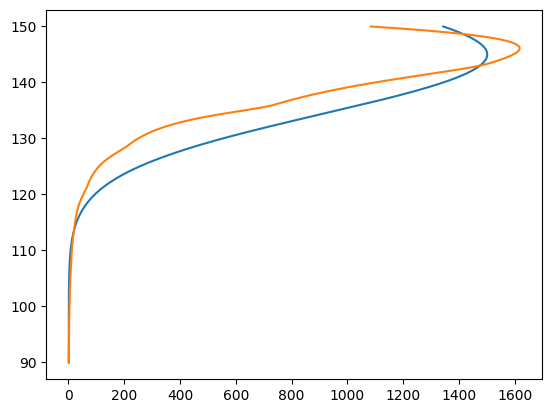

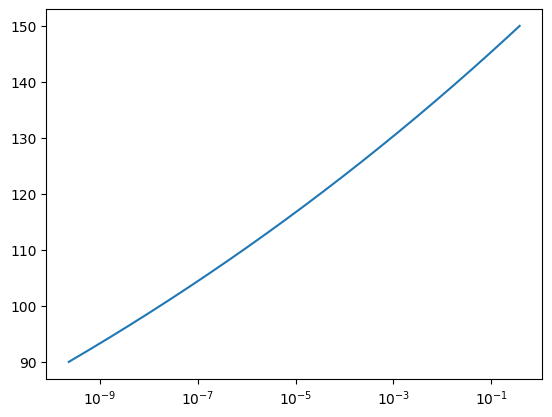

In [230]:
from scipy.optimize import curve_fit

amplification = np.sqrt(f_rho(z0)/f_rho(alts_dayglow))
dz = alts_dayglow[1]-alts_dayglow[0]

def call_alpha(x, a, b):
    return a*np.exp(b*(x/x.min())**0.09)

def func(x, a, b):
    alpha_att = call_alpha(x, a, b)
    attenuation = np.exp(-np.cumsum(alpha_att*dz))
    return attenuation*amplification

best_profile = np.exp(-((alts_dayglow-145.)/15.)**2)*1500.+1.
popt, pcov = curve_fit(func, alts_dayglow, best_profile, p0=[1e-3, 2.5], maxfev=50000,)
print(popt)

plt.figure()
plt.plot(best_profile, alts_dayglow)
plt.plot(func(alts_dayglow, *popt), alts_dayglow)
#plt.xscale('log')

plt.figure()
plt.plot(call_alpha(alts_dayglow, *popt), alts_dayglow)
plt.xscale('log')

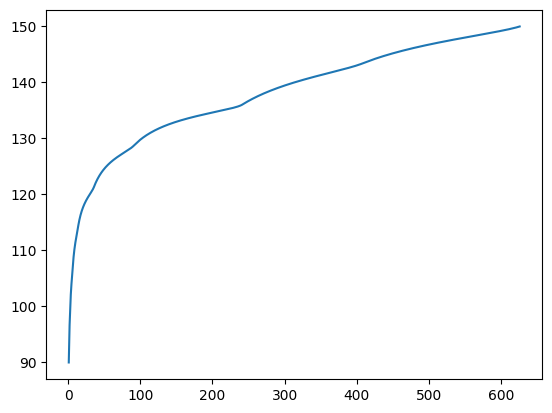

In [200]:
plt.figure()
amplification = np.sqrt(f_rho(z0)/f_rho(alts_dayglow))
alpha_att = 1e-3*np.exp(2.5*alts_dayglow/alts_dayglow.min())
attenuation = np.exp(-np.cumsum(alpha_att*dz))
plt.plot(attenuation*amplification, alts_dayglow)